# Filtro

In [1]:
# Esto se puede quitar sin problema

class ETF_Filter:

    def __init__(self, etfs, tickers, start, end):

        self.start = start

        self.end = end

        self.tickers = sorted(tickers)
        
        self.etfs = sorted(etfs)
        
        self.df = yf.download(self.tickers + self.etfs, self.start, self.end)['Adj Close'].dropna()
        
        self.etf_filtration = self.df[self.etfs].copy()

        self.ticker_filtration = self.df[self.tickers].copy()

        self.pairs = []

        for i in range(len(self.etfs)):
            for j in range(len(self.tickers)):
                self.pairs.append((self.etfs[i],self.tickers[j]))
                
    def TopologicalEmbedding(self, tol=100, lagtime=1):
        
        
        topo = Tembedding(self.df)
        
        for pair in self.pairs:
            resultado = topo.hausdorff(pair[0], pair[1])
            if resultado > tol:
                self.pairs.remove(pair)
            
        self.__filter_data()


    def correlationTest(self, tol = 0.9):
         

        for pair in self.pairs:
                        
            resultado = np.corrcoef(self.etf_filtration[pair[0]],self.ticker_filtration[pair[1]])[0,1]
                
                
            if resultado < tol:

                self.pairs.remove(pair)
            
        self.__filter_data()



    def cointegration(self, tol=0.1):

        for pair in self.pairs:

                resultado = coint(self.etf_filtration[pair[0]],self.ticker_filtration[pair[1]])[1]

                if resultado > tol:

                    self.pairs.remove(pair)
                    
        self.__filter_data()
        
    
    def distance_correlationTest(self, tol=0.3):
        
        for pair in self.pairs:
            
            resultado = correlation_distance(self.etf_filtration[pair[0]],self.ticker_filtration[pair[1]])
            
            if resultado > tol:
                self.pairs.remove(pair)
                
        self.__filter_data()
   
                


    def variationalInformationTest(self, bins = 50, tol = 3.0):
    
        for pair in self.pairs:

            resultado = varInfo(self.etf_filtration[pair[0]],self.ticker_filtration[pair[1]], bins = bins)

            if resultado > tol:

                self.pairs.remove(pair)
                
        self.__filter_data()

    
    def clear_filter(self):

        self.pairs = []
        self.etf_filtration = self.df[self.etfs].copy()
        self.ticker_filtration = self.df[self.tickers].copy()

        for i in range(len(self.etfs)):
            for j in range(len(self.tickers)):
                self.pairs.append((self.etfs[i],self.tickers[j]))
            
  
    def __filter_data(self):
    
        unique_tickers = []
        unique_etfs = []
        
        for pair in self.pairs:
            if pair[0] not in unique_etfs:
                unique_etfs.append(pair[0])
            if pair[1] not in unique_tickers:
                unique_tickers.append(pair[1])
        
        self.ticker_filtration = self.ticker_filtration[unique_tickers]
        self.etf_filtration = self.etf_filtration[unique_etfs]

In [2]:
import numpy as np

import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import seaborn as sns
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
# Los filtros están ahora en una archivo de filtros y basta con importatlos
from Filter import ETF_Filter,  PairsFilter

In [3]:
# Leo los etf de Luis
etfs = list(pd.read_csv('ETFs_lIST.csv', index_col = [0]).columns)

In [4]:
start = datetime.date.today()-datetime.timedelta(days=90)
end = datetime.date.today()-datetime.timedelta(days=45)

tickers = ['ATVI', 'ADBE', 'AMD', 'ALGN', 'GOOG', 'GOOGL', 'AMZN', 'AMGN', 'ADI', 'AAPL', 'AMAT', 'ASML', 'ADSK',
    'ADP','BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 
    'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM' ,'DOCU' ,'DLTR' ,'EBAY', 'EA' ,'EXC','EXPE','FB', 
    'FAST', 'FISV', 'FOX', 'FOXA', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG',
    'JD', 'KLAC', 'LRCX', 'LBTYA', 'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT','MRNA', 'MDLZ', 'MNST', 'NTES', 
    'NFLX' ,'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST',
    'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO','TSLA', 'TXN', 'KHC', 'TCOM', 
    'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDC', 'WDAY', 'XEL', 'ZM']


In [5]:
# Iniicalizo los filtros
Filtro_pares = PairsFilter(tickers, start, end)
Filtro_ETF = ETF_Filter(etfs, tickers, start, end)

[*********************100%***********************]  98 of 98 completed
[*********************100%***********************]  1098 of 1098 completed


In [12]:
# Falta ver que filtre todo a la primera
print(len(Filtro_pares.pairs))
Filtro_pares.variationalInformationTest(tol = 1.0, bins = 30)
Filtro_pares.correlationTest(tol = 0.8)
Filtro_pares.TopologicalEmbedding(tol=80)
Filtro_pares.cointegration(tol=0.1)
print(len(Filtro_pares.pairs))


39
39


In [23]:
print(len(Filtro_ETF.pairs))
Filtro_ETF.variationalInformationTest(tol = 1.0, bins = 30)
Filtro_ETF.correlationTest(tol = 0.8)
Filtro_ETF.TopologicalEmbedding(tol=80)
Filtro_ETF.cointegration(tol=0.2)
print(len(Filtro_ETF.pairs))


1736
1736


In [26]:
Filtro_pares.pairs

[('AAPL', 'PAYX'),
 ('AMAT', 'CPRT'),
 ('AMAT', 'SBUX'),
 ('AMZN', 'DXCM'),
 ('BIIB', 'TXN'),
 ('CDNS', 'ZM'),
 ('CERN', 'WDC'),
 ('CMCSA', 'EXC'),
 ('CPRT', 'CTSH'),
 ('CPRT', 'DOCU'),
 ('CPRT', 'PAYX'),
 ('CPRT', 'PYPL'),
 ('CPRT', 'SBUX'),
 ('CPRT', 'SWKS'),
 ('CSX', 'EBAY'),
 ('CTAS', 'ULTA'),
 ('CTSH', 'PAYX'),
 ('CTSH', 'SPLK'),
 ('CTXS', 'PAYX'),
 ('DOCU', 'PYPL'),
 ('DOCU', 'TMUS'),
 ('DOCU', 'TTWO'),
 ('DXCM', 'PAYX'),
 ('DXCM', 'SBUX'),
 ('EXC', 'LBTYA'),
 ('FISV', 'PAYX'),
 ('FOX', 'SBUX'),
 ('GOOG', 'GOOGL'),
 ('INCY', 'PYPL'),
 ('INCY', 'SBUX'),
 ('INCY', 'ZM'),
 ('ISRG', 'VRTX'),
 ('PAYX', 'SWKS'),
 ('SBUX', 'SWKS'),
 ('SBUX', 'TMUS'),
 ('SBUX', 'ZM'),
 ('SPLK', 'SWKS'),
 ('SWKS', 'ZM'),
 ('TMUS', 'TTWO')]

# Listar ETFS

In [27]:
'''
ticker1: Primer par de ticker
ticker2: Segundo par de ticker
df: dataframe de pairs
'''
# Acá me arroja los etf con sus filtros, aun falta optimizar código acá
def encontrar_ETF(ticker1, ticker2, filtro_ETF):
    
    
    filtro = pd.DataFrame(filtro_ETF.pairs, columns= ['ETF', 'Ticker']).set_index('ETF')
    
    
    df_pair1 = filtro.query(f"Ticker == '{ticker1}'")
    df_pair2 = filtro.query(f"Ticker == '{ticker2}'")
        
    ETF_df = pd.merge(df_pair1, df_pair2, right_index = True, left_index = True)
    
    ETF = ETF_df.index
    
    return list(ETF)
    

In [29]:
# Devuelve los etf para el par
pairs = encontrar_ETF('TMUS', 'TTWO', Filtro_ETF)

print(pairs)




['EFG', 'EVX', 'FBT', 'IDU', 'IXJ', 'KCE', 'MOO', 'PSJ', 'RPG', 'RXL', 'RZV', 'VIOV', 'XHE', 'XHS', 'XTL']


# Graficas

In [24]:
start = pd.to_datetime("2021-01-01")
end = pd.to_datetime("2022-07-01")
df = yf.download(tickers+etfs, start = start, end = end)['Adj Close'].dropna()

[*********************100%***********************]  1098 of 1098 completed


In [379]:
coint(df[B], df[A])

(-3.167920950514618,
 0.07545831321847783,
 array([-3.92720682, -3.35320272, -3.05628503]))

In [421]:
import matplotlib.pyplot as plt

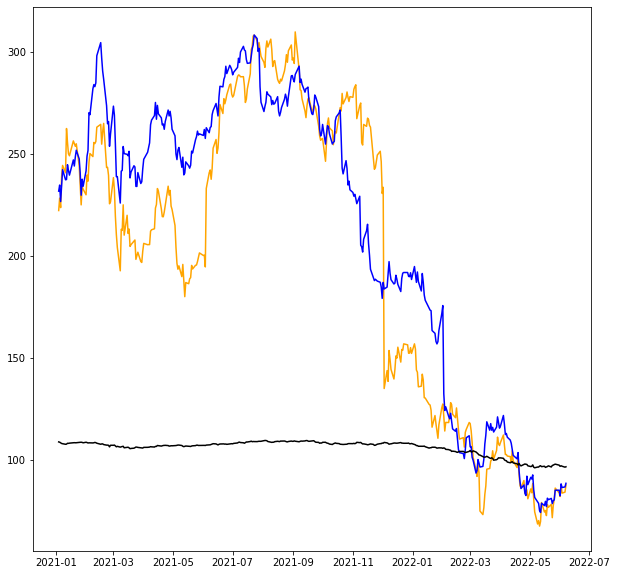

In [543]:
A = "TMUS"
B = "PYPL"
C = "BOND"

plt.figure(figsize=(10,10))
plt.plot(df[A], c= 'orange')
plt.plot(df[B], c='blue')
plt.plot(df[C], c='black')

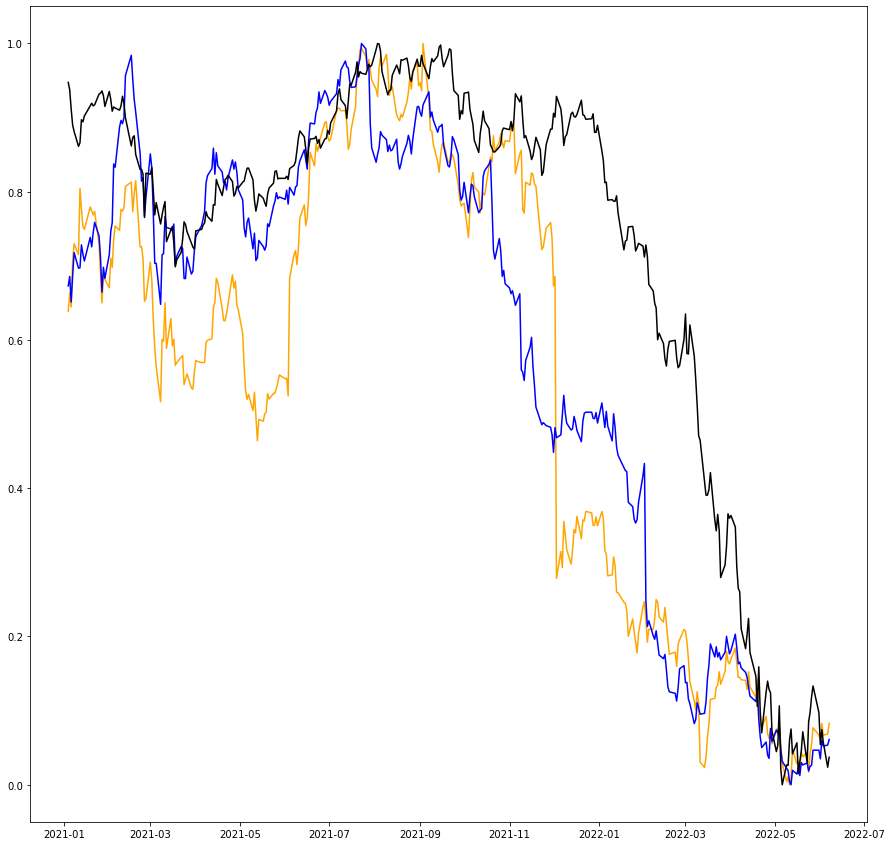

In [544]:
plt.figure(figsize=(15,15))
plt.plot((df[A]-np.min(modelo.df[A]))/(np.max(df[A]) - np.min(df[A])), c='orange')
plt.plot((df[B]-np.min(modelo.df[B]))/(np.max(df[B]) - np.min(df[B])), c="blue")
plt.plot((df[C]-np.min(modelo.df[C]))/(np.max(df[C]) - np.min(df[C])), c="black")


# Batches

In [ ]:
cdns, snps, vtg
lulu, snps, igv
ebay, wba, frel
ebay, wba, fas
ebay, wba, IDHQ # 30% de retornos
ebay, wba, ioo

amd, bidu, ewgs # junio a diciembre 2021
amd, bidu, ewsc

In [30]:
# Acá intentaba hacer el estudio por épocas


batches = np.array_split(df, 12)
# Cargar xlabel
xlabel = []
for i in range(len(batches)):
    xlabel.append(batches[i].index[0].strftime('%Y-%b-%d') + ":" + batches[i].index[-1].strftime('%Y-%b-%d'))

In [31]:
correlacion = np.zeros(len(batches))
cointegracion = np.zeros(len(batches))
cointegracionETF1 = np.zeros(len(batches))
correlacionETF1 = np.zeros(len(batches))
cointegracionETF2 = np.zeros(len(batches))
correlacionETF2 = np.zeros(len(batches))
Ticker1 = "LULU"
Ticker2 = "SNPS"
ETF = "IGV"


In [32]:
for i in range(len(batches)):
    correlacion[i] = np.corrcoef(batches[i][Ticker1], batches[i][Ticker2])[1,0]
    cointegracion[i] = coint(batches[i][Ticker1], batches[i][Ticker2])[1]
    
    cointegracionETF1 = coint(batches[i][Ticker1], batches[i][ETF])[1]
    correlacionETF1 = np.corrcoef(batches[i][Ticker1], batches[i][ETF])[1,0]
    
    cointegracionETF2 = coint(batches[i][Ticker2], batches[i][ETF])[1]
    correlacionETF2 = np.corrcoef(batches[i][Ticker2], batches[i][ETF])[1,0]

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (12).

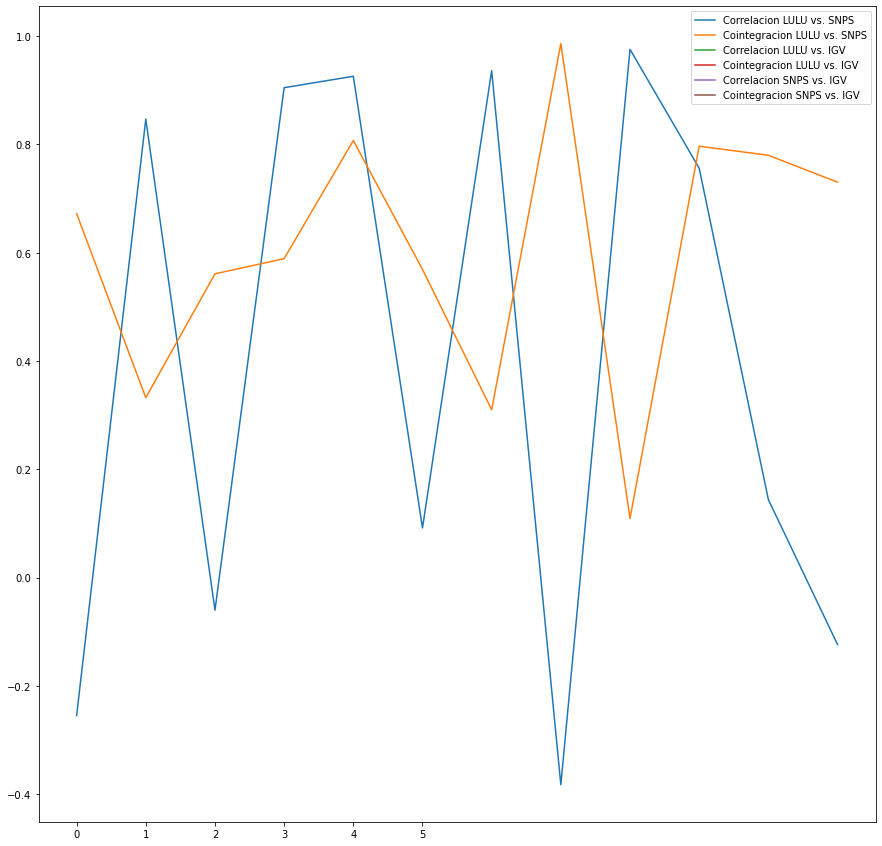

In [33]:
plt.figure(figsize = (15,15))
plt.plot(correlacion, label = "Correlacion " + Ticker1 + " vs. " + Ticker2)
plt.plot(cointegracion, label = "Cointegracion " + Ticker1 + " vs. " + Ticker2)

plt.plot(correlacionETF1, label = "Correlacion " + Ticker1 + " vs. " + ETF)
plt.plot(cointegracionETF1, label = "Cointegracion " + Ticker1 + " vs. " + ETF)

plt.plot(correlacionETF2, label = "Correlacion " + Ticker2 + " vs. " + ETF)
plt.plot(cointegracionETF2, label = "Cointegracion " + Ticker2 + " vs. " + ETF)
leg = plt.legend()
plt.xticks([0, 1, 2, 3, 4, 5],xlabel)
plt.show()